In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [3]:
from datetime import datetime, time
import pandas_datareader.data as pdr
import yfinance as yf

In [4]:
today = datetime.now().date()
five_year_ago = today.replace(year = today.year-5)
ten_year_ago = today.replace(year = today.year-10)
twenty_year_ago = today.replace(year= today.year-20)
stock_symbol = "AAPL"
try:
    data =yf.download(stock_symbol, start=ten_year_ago, end=today, rounding=True,multi_level_index=False)
    print(data.head())
except Exception as e:
    print(f"Error: {e}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

            Close   High    Low   Open     Volume
Date                                             
2015-04-21  28.34  28.63  28.29  28.61  129740400
2015-04-22  28.72  28.78  28.21  28.36  150618000
2015-04-23  28.96  29.13  28.62  28.65  183083600
2015-04-24  29.10  29.17  28.86  29.14  178103600
2015-04-27  29.62  29.73  29.29  29.55  387816800


Exponential moving avergae

In [26]:
#using ewm methidmethod

ema = data['Close'].ewm(span=20,adjust=False).mean()


In [27]:
#Simple moving average
sma = data['Close'].rolling(20).mean()

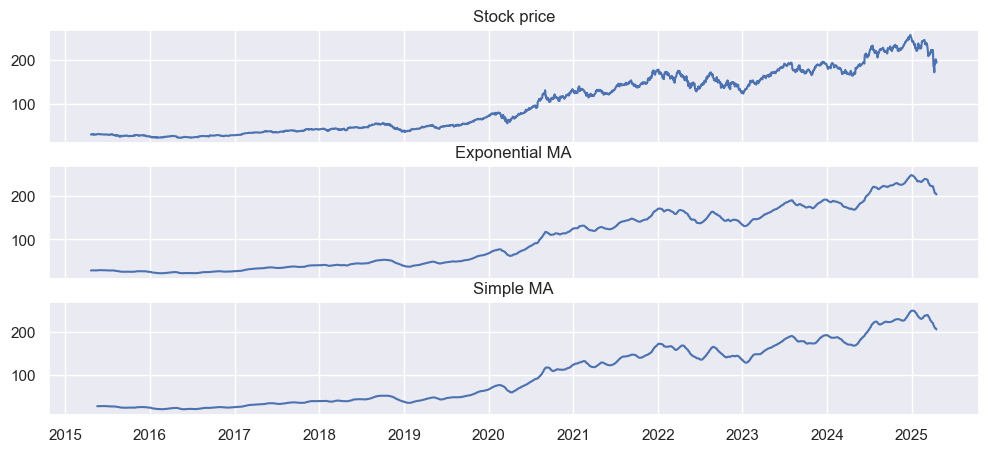

In [28]:


#Plotting the value
fig, axs = plt.subplots(3, figsize=(12,5),sharex=True, sharey=True)
axs[0].plot(data['Close'])
axs[0].set_title("Stock price")
axs[1].plot(ema)
axs[1].set_title("Exponential MA")
axs[2].plot(sma)
axs[2].set_title("Simple MA")
plt.show()




Experimenting different parameters of ewm:

*  span - define size of the window for smoothing
*  halflife - after halflife period, the weight of older data is cut in half
*  alpha - lower alpha means smoother curves because it gives less weight to new data points.
*  com- how much weight recent observations get
*  adjust - if True(default), considers the weight cumulatively else give more weight to recent observations.

In [30]:
ema_span = data['Close'].ewm(span=20,adjust=False).mean()
ema_halflife = data['Close'].ewm(halflife=20,adjust=False).mean()
ema_alpha = data['Close'].ewm(alpha=0.3,adjust=False).mean()



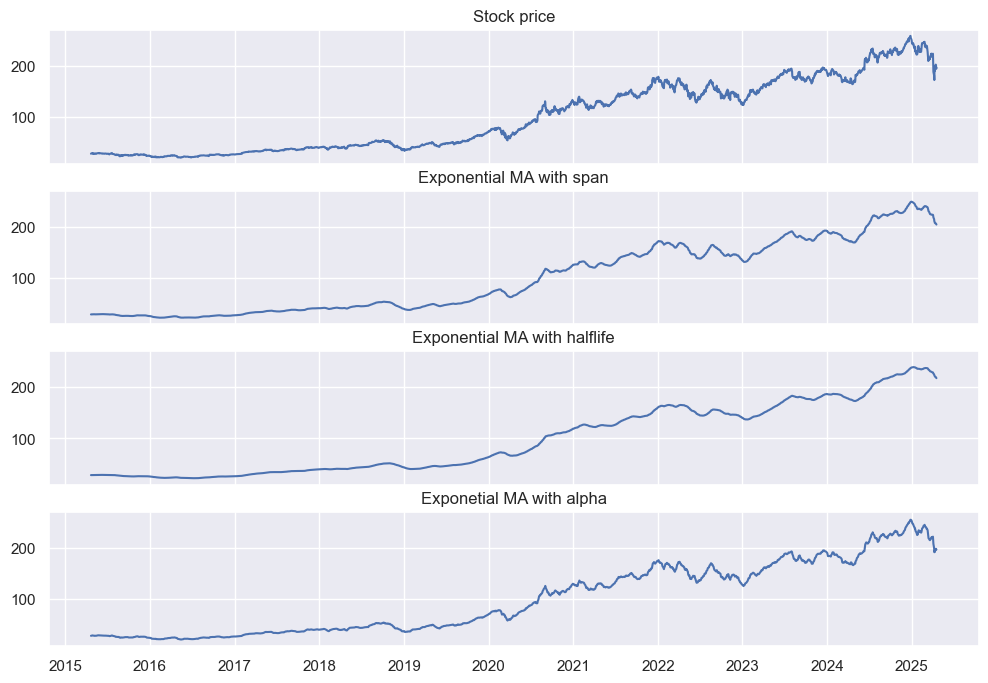

In [32]:
#Plotting ema with different parameters
fig, axs = plt.subplots(4, figsize=(12,8),sharex=True, sharey=True)
axs[0].plot(data['Close'])
axs[0].set_title("Stock price")
axs[1].plot(ema_span)
axs[1].set_title("Exponential MA with span")
axs[2].plot(ema_halflife)
axs[2].set_title("Exponential MA with halflife")
axs[3].plot(ema_alpha)
axs[3].set_title("Exponetial MA with alpha")
plt.show()


In [35]:
df = pd.DataFrame(data['Close'],index=data.index)
df.head()

,Close
Date,
2015-04-21,28.34
2015-04-22,28.72
2015-04-23,28.96
2015-04-24,29.10
2015-04-27,29.62


Calculation MACD formula
* MACD = 12-period EMA - 26-period EMA

In [56]:
#Calculate 12-period ema
df['EMA12'] = data['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
#calculate 26-period ema
df['EMA26'] = data['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

#Calculate MACD
df['MACD'] = df['EMA12'] - df['EMA26']

#calculate signal line (9-period ema of macd line)
df['signal'] = df['MACD'].ewm(span=9, adjust=False, min_periods=9).mean()

In [58]:
#Drawing histogram
df['Hist'] = df['MACD'] - df['signal']

In [66]:
df

,Close,EMA12,EMA26,MACD,signal,Hist
Date,,,,,,
2015-04-21,28.34,NaN,NaN,NaN,NaN,NaN
2015-04-22,28.72,NaN,NaN,NaN,NaN,NaN
2015-04-23,28.96,NaN,NaN,NaN,NaN,NaN
2015-04-24,29.10,NaN,NaN,NaN,NaN,NaN
2015-04-27,29.62,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-04-11,198.15,200.450394,210.334542,-9.884148,-8.173151,-1.710997
2025-04-14,202.52,200.768795,209.755687,-8.986892,-8.335899,-0.650993
2025-04-15,202.14,200.979750,209.191562,-8.211812,-8.311081,0.099269


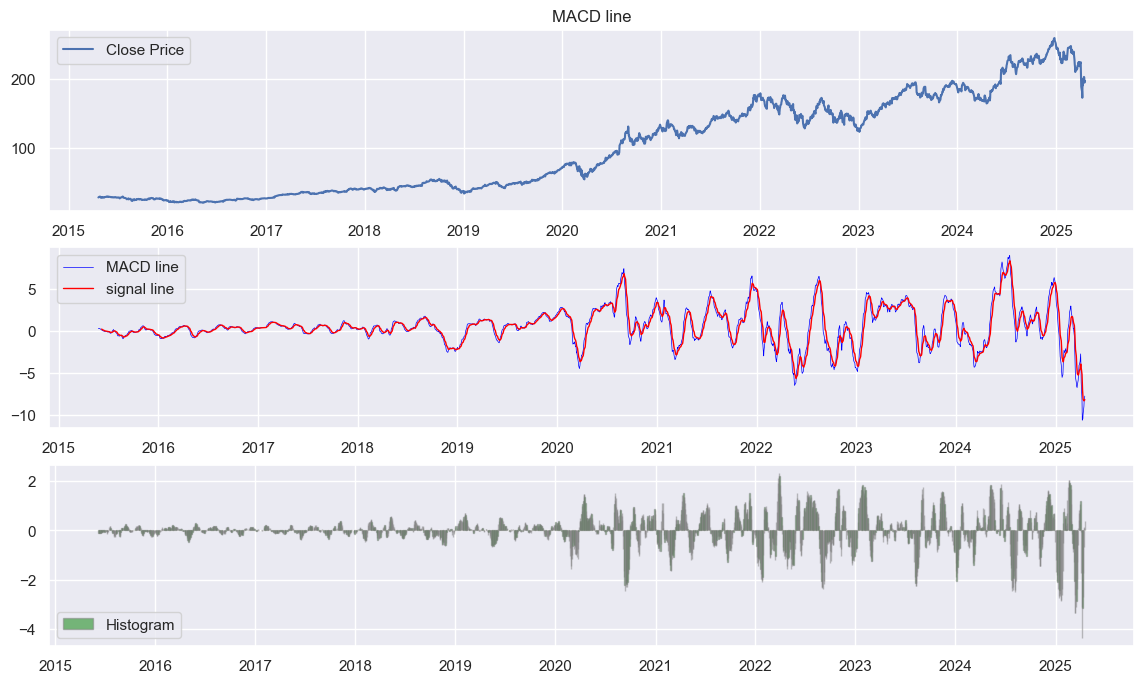

In [86]:
#Plotting MACD
fig = plt.figure(figsize=(14,8))
ax0 = fig.add_subplot(3,1,1)
ax0.set(title="MACD line")
ax0.plot(df['Close'], label='Close Price')
ax0.legend()
ax1 = fig.add_subplot(3,1,2)
ax1.plot(df['MACD'],linewidth=0.5, color = 'blue' ,label='MACD line')
ax1.plot(df['signal'],linewidth=1, color = 'red' ,label='signal line')
ax1.legend()
ax2 = fig.add_subplot(3,1,3)
ax2.bar(df.index, df['Hist'], color ='green', edgecolor='grey', alpha=0.5,  label='Histogram')
ax2.legend()
plt.show()


#Using ta package


In [67]:
import ta

In [68]:
df_ta = pd.DataFrame(df['Close'])
df_ta.head()

,Close
Date,
2015-04-21,28.34
2015-04-22,28.72
2015-04-23,28.96
2015-04-24,29.10
2015-04-27,29.62


In [70]:
macd_obj = ta.trend.MACD(df_ta['Close'])
df_ta['MACD'] = macd_obj.macd()
df_ta['signal'] = macd_obj.macd_signal()
df_ta['Hist'] = macd_obj.macd_diff()
df_ta.tail()

,Close,MACD,signal,Hist
Date,,,,
2025-04-11,198.15,-9.884148,-8.173151,-1.710997
2025-04-14,202.52,-8.986892,-8.335899,-0.650993
2025-04-15,202.14,-8.211812,-8.311081,0.099269
2025-04-16,194.27,-8.138780,-8.276621,0.137841
2025-04-17,196.98,-7.772630,-8.175823,0.403193


In [71]:
df.tail()

,Close,EMA12,EMA26,MACD,signal,Hist
Date,,,,,,
2025-04-11,198.15,200.450394,210.334542,-9.884148,-8.173151,-1.710997
2025-04-14,202.52,200.768795,209.755687,-8.986892,-8.335899,-0.650993
2025-04-15,202.14,200.979750,209.191562,-8.211812,-8.311081,0.099269
2025-04-16,194.27,199.947481,208.086261,-8.138780,-8.276621,0.137841
2025-04-17,196.98,199.490945,207.263575,-7.772630,-8.175823,0.403193


macd from ta package shows same values 

Entry Signal
* Buy when MACD is higher than Signal i.e. Hist is positive
* Sell when MAcd crosses below signal i.e hist is negative

In [93]:
df["Bullish_crossover"] = (df['MACD'] > df['signal']) & (df['MACD'].shift(1) <= df['signal'].shift(1))
df["Bearish_crossover"] = (df['MACD'] < df['signal']) & (df['MACD'].shift(1) >= df['signal'].shift(1))


In [94]:
df

,Close,EMA12,EMA26,MACD,signal,Hist,Bullish_crossover,Bearish_crossover
Date,,,,,,,,
2015-04-21,28.34,NaN,NaN,NaN,NaN,NaN,False,False
2015-04-22,28.72,NaN,NaN,NaN,NaN,NaN,False,False
2015-04-23,28.96,NaN,NaN,NaN,NaN,NaN,False,False
2015-04-24,29.10,NaN,NaN,NaN,NaN,NaN,False,False
2015-04-27,29.62,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...
2025-04-11,198.15,200.450394,210.334542,-9.884148,-8.173151,-1.710997,False,False
2025-04-14,202.52,200.768795,209.755687,-8.986892,-8.335899,-0.650993,False,False
2025-04-15,202.14,200.979750,209.191562,-8.211812,-8.311081,0.099269,True,False


In [95]:
df['Close'][df['Bullish_crossover']]

Date
2015-07-15     28.44
2015-08-18     26.24
2015-08-28     25.52
2015-10-12     25.14
2016-01-22     22.95
               ...  
2024-10-10    228.54
2024-11-19    228.03
2025-01-29    239.10
2025-03-25    223.75
2025-04-15    202.14
Name: Close, Length: 87, dtype: float64

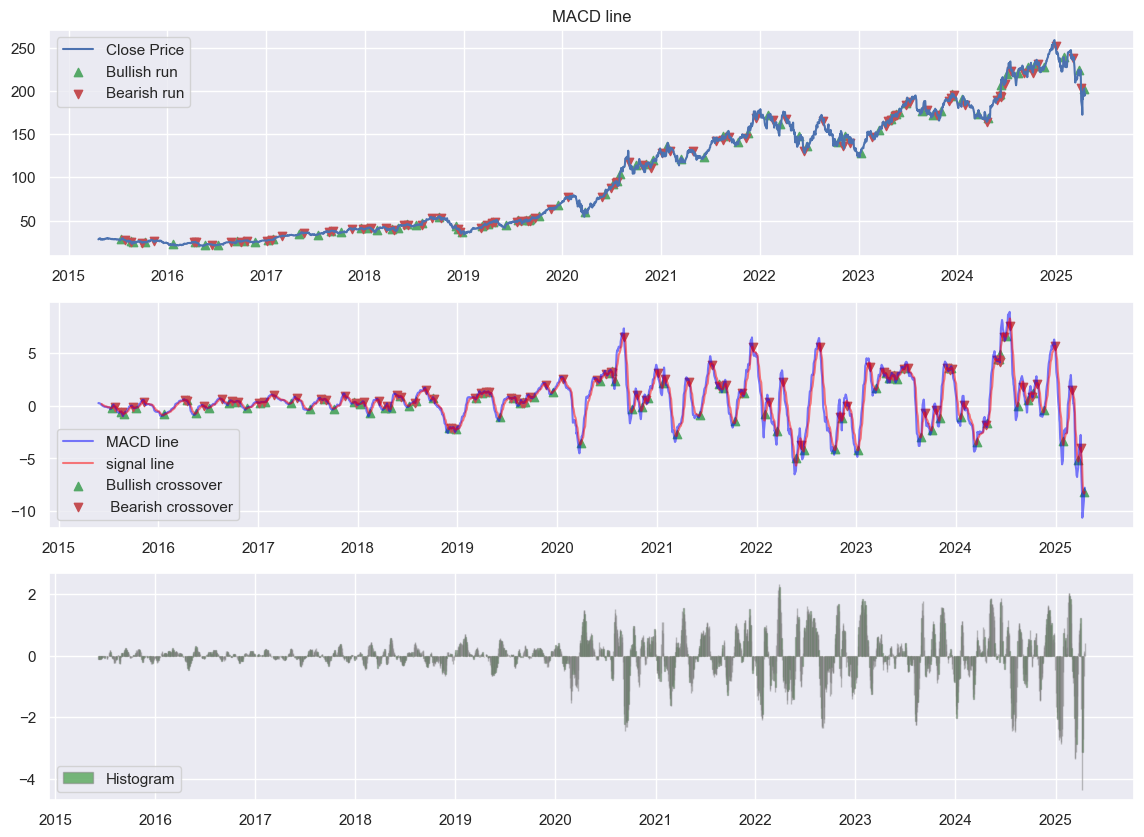

In [99]:
fig = plt.figure(figsize=(14,10))
ax0 = fig.add_subplot(3,1,1)
ax0.set(title="MACD line")
ax0.plot(df['Close'], label='Close Price')
ax0.scatter(df.index[df['Bullish_crossover']], df['Close'][df['Bullish_crossover']], marker='^', color='g', label ='Bullish run')
ax0.scatter(df.index[df['Bearish_crossover']], df['Close'][df['Bearish_crossover']], marker='v', color='r', label ='Bearish run')
ax0.legend()

ax1 = fig.add_subplot(3,1,2)
ax1.plot(df['MACD'], color = 'blue' ,label='MACD line', alpha=0.5)
ax1.plot(df['signal'], color = 'red' ,label='signal line', alpha = 0.5)

ax1.scatter(df.index[df['Bullish_crossover']], df['MACD'][df['Bullish_crossover']], marker='^', color='g', label ='Bullish crossover')
ax1.scatter(df.index[df['Bearish_crossover']], df['MACD'][df['Bearish_crossover']], marker='v', color='r', label =' Bearish crossover')
ax1.legend()
ax2 = fig.add_subplot(3,1,3)
ax2.bar(df.index, df['Hist'], color ='green', edgecolor='grey', alpha=0.5,  label='Histogram')
ax2.legend()
plt.show()

Bollinger bands

In [110]:
boll_df = pd.DataFrame(data['Close'])

In [111]:
boll_df.head()

,Close
Date,
2015-04-21,28.34
2015-04-22,28.72
2015-04-23,28.96
2015-04-24,29.10
2015-04-27,29.62


In [112]:
boll_df['sma'] = boll_df['Close'].rolling(window=20).mean()
boll_df.tail()

,Close,sma
Date,,
2025-04-11,198.15,209.2070
2025-04-14,202.52,208.6330
2025-04-15,202.14,208.1055
2025-04-16,194.27,207.0570
2025-04-17,196.98,206.2010


In [113]:
boll_df['20_days_sd'] = boll_df['Close'].rolling(window=20).std()
boll_df.tail()

,Close,sma,20_days_sd
Date,,,
2025-04-11,198.15,209.2070,15.757109
2025-04-14,202.52,208.6330,15.782397
2025-04-15,202.14,208.1055,15.815934
2025-04-16,194.27,207.0570,16.011944
2025-04-17,196.98,206.2010,16.073109


In [114]:
boll_df['upper_band'] = boll_df['sma'] + 2 * boll_df['20_days_sd']
boll_df['lower_band'] = boll_df['sma'] - 2 * boll_df['20_days_sd']

In [115]:
boll_df.tail()

,Close,sma,20_days_sd,upper_band,lower_band
Date,,,,,
2025-04-11,198.15,209.2070,15.757109,240.721219,177.692781
2025-04-14,202.52,208.6330,15.782397,240.197794,177.068206
2025-04-15,202.14,208.1055,15.815934,239.737368,176.473632
2025-04-16,194.27,207.0570,16.011944,239.080888,175.033112
2025-04-17,196.98,206.2010,16.073109,238.347219,174.054781


In [116]:
import plotly.graph_objs as go


In [127]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=boll_df.index, y = boll_df["Close"], mode='lines',name ='Price' ))

fig.add_trace(go.Scatter(x=boll_df.index, y = boll_df['upper_band'], mode='lines', name='Upper band', line=dict(color='red')))
fig.add_trace(go.Scatter(x=boll_df.index, y = boll_df['lower_band'], 
                         fill='tonexty', mode='lines', name='Lower band', line = dict(color = 'green')))
fig.add_trace(go.Scatter(x=boll_df.index, y = boll_df['sma'], mode='lines', name='SMA', line= dict(color = 'blue')))

fig.update_layout(autosize = False, 
                  minreducedwidth=250, minreducedheight = 100,
                  width=1200, height = 500,
    title='Bollinger Bands',
                  xaxis_title = "date",
                  yaxis_title = 'price',
                  showlegend = True)

fig.show()
